In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [28]:
df = pd.read_csv('149921-Activity_2024-06-09_16-09_98563456.csv')
# df = pd.read_csv('149921-Activity_2024-06-11_20-19_98721660.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Duration           3033 non-null   int64  
 1   Distance           3033 non-null   float64
 2   Latitude           3033 non-null   float64
 3   Longitude          3033 non-null   float64
 4   AltitudeOriginal   3033 non-null   int64  
 5   AltitudeCorrected  3033 non-null   int64  
 6   OriginalPace       3033 non-null   int64  
 7   HeartRate          3027 non-null   float64
 8   Cadence            3028 non-null   float64
 9   PowerCalculated    3033 non-null   int64  
 10  Unnamed: 10        0 non-null      float64
dtypes: float64(6), int64(5)
memory usage: 260.8 KB


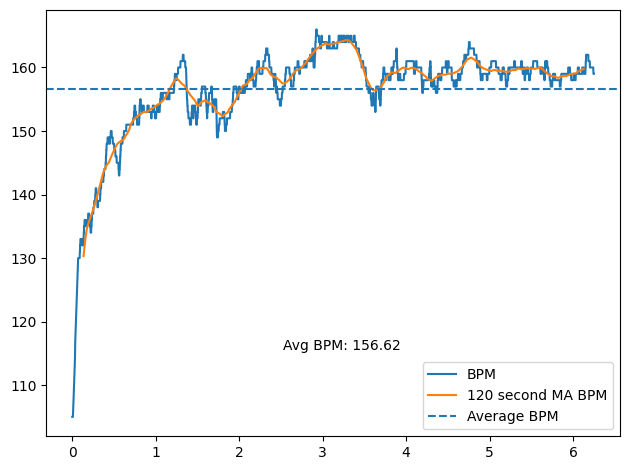

In [29]:
window=120
df['Distance'] = df['Distance'].fillna(method='ffill')
df['HeartRate'] = df['HeartRate'].fillna(method='ffill')

plt.plot(df['Distance'], df['HeartRate'], label='BPM')
df['HeartRate_MA'] = df['HeartRate'].rolling(window=window).mean()
df['Distance_MA'] = df['Distance'].rolling(window=window).mean()
plt.plot(df['Distance_MA'], df['HeartRate_MA'], label=f'{window} second MA BPM')

plt.axhline(df['HeartRate'].mean(), linestyle='--', label='Average BPM')
plt.text(df['Distance'].median(), df['HeartRate'].min()*1.1,
        f'Avg BPM: {df["HeartRate"].mean():.2f}', ha='center')

plt.legend()
plt.tight_layout()
plt.show()
